## Neural Networks - Project 1

Pegah Givehchian
99222089

# Question 1





L1 vs L2 regularization:

In general regularization is used to minimize our loss function and avoid over/under fitting. In bot methods we add a value to our loss function to reduce the variance between the train and test datasets and add a little bias.

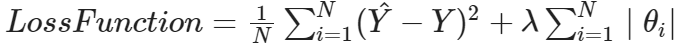

In [28]:
Image("img/L1.png")

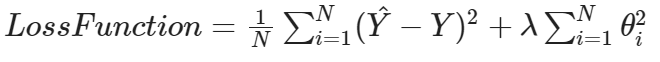

In [30]:
Image("img/L2.png")

L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights.

L1 creates a more sparse model than L2. It has a better performance with outlier points and is more robust, meaning that output and forecast are consistently accurate. 
It creates a more simple method, which makes it a little harder to learn complicated algorithms.
But L2 is less computationally expensive, because L1 takes the absolute values of the weights.

By adding these regularizations, the weights are reduced, so that the models become more simple. So it decreases the chance of overfitting the training data.

Where L1 regularization attempts to estimate the median of data, L2 regularization makes estimation for the mean of the data in order to evade overfitting.

Due to the reasons mentioned above, I would prefer L2 regression.
Also while training the models in exercise 2, the model in which i used L2 regression had a better loss than L1 and a lower variance.


# **Question 2**


In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import Image
from tensorflow.keras import regularizers

Import datasets

In [11]:
train_data = pd.read_csv("Dataset/fashion-mnist_train.csv")
test_data = pd.read_csv("Dataset/fashion-mnist_test.csv")

In [12]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_data.shape

(60000, 785)

In [14]:
train_data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

### Modeling Simple Model

In [15]:
trainDataMatrix = np.asmatrix(train_data)

In [16]:
trainDataMatrix

matrix([[2, 0, 0, ..., 0, 0, 0],
        [9, 0, 0, ..., 0, 0, 0],
        [6, 0, 0, ..., 0, 0, 0],
        ...,
        [8, 0, 0, ..., 0, 0, 0],
        [8, 0, 0, ..., 0, 0, 0],
        [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
Y = trainDataMatrix[:,0]

In [18]:
Y

matrix([[2],
        [9],
        [6],
        ...,
        [8],
        [8],
        [7]], dtype=int64)

In [19]:
X = trainDataMatrix[:,1:]

In [20]:
X

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
simpleModel = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1"),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2"),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_3"),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "TheFirstModel"
) 

In [15]:
simpleModel.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
simpleModel.fit(
    X,Y,
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3489
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4785
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4363
Epoch 4/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4250
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3976
Epoch 6/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3775
Epoch 7/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3615
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3529
Epoch 9/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3449
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3332
Epoch 11/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3340
Epoch 12/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3195

In [24]:
testMatrix = np.asmatrix(test_data)
xTest = testMatrix[:,1:]
yTest = testMatrix[:,0]

In [17]:
simpleModel.evaluate(xTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3974


0.3973921239376068

We try to decrease the variance and loss by implementing different methods and regularizations.

### Depth Effect

The number of layers in a neural network defines its depth. So I try to create different models with different number of layers to understand its effect.

##### 5 Layers

In [72]:
count5LayerModel = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1"),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2"),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_3"),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_4"),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_5"),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "count5LayerModel"
) 

In [73]:
count5LayerModel.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
count5LayerModel.fit(
    X,Y,
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8956
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4703
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4269
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4012
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3773
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3627
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3471
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3332
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3258
Epoch 10/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3216
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3121
Epoch 12/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2979
E

In [74]:
count5LayerModel.evaluate(xTest, yTest)

313/313 [==============================] - 1s 3ms/step - loss: 0.4297


0.4297083914279938

##### 2 Layers

In [75]:
count2LayerModel = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1"),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2"),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "count2LayerModel"
) 

In [76]:
count2LayerModel.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
count2LayerModel.fit(
    X,Y,
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1136
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6514
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5859
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5229
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4697
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4430
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4218
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4088
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4059
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3915
Epoch 11/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3835
Epoch 12/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3791
E

In [77]:
count2LayerModel.evaluate(xTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.4555


0.45554590225219727

##### 10 Layers

In [78]:
count10LayerModel = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1"),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2"),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_3"),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_4"),
        Dense(units=225 ,activation=tf.nn.relu,name="hidden_layer_5"),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_6"),
        Dense(units=28 ,activation=tf.nn.relu,name="hidden_layer_7"),
        Dense(units=64 ,activation=tf.nn.relu,name="hidden_layer_8"),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_9"),
        Dense(units=225 ,activation=tf.nn.relu,name="hidden_layer_10"),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "count10LayerModel"
) 

In [79]:
count10LayerModel.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
count10LayerModel.fit(
    X,Y,
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6390
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4669
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4246
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3982
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3757
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3686
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3584
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3445
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3393
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3391
Epoch 11/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3245
Epoch 12/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3205

In [80]:
count10LayerModel.evaluate(xTest, yTest)

313/313 [==============================] - 1s 3ms/step - loss: 0.4052


0.40516334772109985

We see that the more depth we add to our network, the less our loss becomes, but our variance becomes higher, which means that our model is overfitting.

### Normalization


We devide our inputs by 255 so that they are between 0 and 1

In [18]:
normalX = X/255

In [19]:
simpleModel.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
simpleModel.fit(
    normalX,Y,
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3547
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2797
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2634
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2512
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2429
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2352
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2269
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2206
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2147
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2067
Epoch 11/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2009
Epoch 12/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1971

In [20]:
simpleModel.evaluate(xTest/255, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3517


0.3516875207424164

we see that our loss has decreased, but we have a high variance, so our model is still overfitting.

### Batch Normalization

In [21]:
Model2 = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1"),
        BatchNormalization(),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2"),
        BatchNormalization(),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_3"),
        BatchNormalization(),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "BatchNormalizationModel"
) 

In [23]:
Model2.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
Model2.fit(
    X,Y,
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4994
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3936
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3571
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3346
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3200
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3026
Epoch 7/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2917
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2795
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2715
Epoch 10/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2642
Epoch 11/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2531
Epoch 12/15
1875/1875 [==============================] - 12s 6ms/step - lo

In [31]:
Model2.evaluate(xTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.4204


0.420440137386322

Batch with the use of normalization

In [32]:
Model2.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
Model2.fit(
    normalX,Y,
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2197
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2140
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2069
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2026
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1986
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1948
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1893
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1838
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1810
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1766
Epoch 11/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1730
Epoch 12/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.16

In [33]:
Model2.evaluate(xTest/255, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3373


0.33728882670402527

we see that batch normalization's loss is less than the simple model. But it has a high variance because the loss in the test and train datasets differ a lot, which means our model is yet still overfitting, so we use different methods like the dropout technique, early stopping or L1 L2 regularizations to decrease the variance and avoid overfitting.

### Dropout

Dropout is generally used for weakening the model to avoid overfitting, by dropping randomly selected neurons. 

In [60]:
Model3 = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1"),
        Dropout(0.3),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2"),
        Dropout(0.5),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_3"),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "DropOutModel"
) 

In [61]:
Model3.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
Model3.fit(
    X,Y,
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4973
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0378
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8729
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8187
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7598
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7460
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7254
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7197
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6960
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6907
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6854
Epoch 12/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6825
E

In [62]:
Model3.evaluate(xTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.5810


0.5810006856918335

We see that adding dropout gives us a higher loss than the simple model, but a lower variance, which makes our model more trustworthy.

### Early Stopping Criteria

One of the methods used to avoid overfitting. It stops training as soon as the validation error reaches a minimum.

In [63]:
Model4 = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1"),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2"),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_3"),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "EarlyStoppingModel"
) 

In [64]:
Model4.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
Model4.fit(
    X,Y,
    epochs=15,
    callbacks=[EarlyStopping()]
)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3856
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5186
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4545
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4164
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3996
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3790
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3633
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3524
Epoch 9/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3457
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3358
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3373
Epoch 12/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3258
E

In [65]:
Model4.evaluate(xTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3754


0.3753807246685028

We see that it has a high loss, but it is lower than the dropout technique.

### L1 Regularization

In [57]:
Model5 = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1", kernel_regularizer='l1'),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2", kernel_regularizer='l1'),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_3", kernel_regularizer='l1'),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "L1Model"
) 

In [58]:
Model5.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
Model5.fit(
    X,Y,
    epochs=15,
)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 33.6343
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4071
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2655
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2142
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2271
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2136
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2111
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2010
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1891
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2136
Epoch 11/15
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1858
Epoch 12/15
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1924


In [66]:
Model5.evaluate(xTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 1.1481


1.1480625867843628

This regularization technique gives us an even higher loss than the dropout or early stopping methods, but it's lesss overfitting.

### L2 Regularization

In [67]:
Model6 = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1", kernel_regularizer='l2'),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2", kernel_regularizer='l2'),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_3", kernel_regularizer='l2'),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "L2Model"
) 

In [68]:
Model6.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
Model6.fit(
    X,Y,
    epochs=15,
)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 5.8678
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0531
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9369
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6412
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5741
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5562
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5541
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5450
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5356
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5355
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5293
Epoch 12/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5277
E

In [69]:
Model6.evaluate(xTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.5247


0.5246573686599731

L2's loss is less than L1. Variance is very low, because the loss in the train and test dataset doesn't differ a lot, Which means L2 is a good regularizer.

### L1_L2 Regularization

In [5]:
Model7 = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=225 ,activation=tf.nn.relu ,name="hidden_layer_1", kernel_regularizer='l1_l2'),
        Dense(units=256 ,activation=tf.nn.relu,name="hidden_layer_2", kernel_regularizer='l1_l2'),
        Dense(units=128 ,activation=tf.nn.relu,name="hidden_layer_3", kernel_regularizer='l1_l2'),
        Dense(units=10 ,activation=tf.nn.softmax,name="output_layer"),
    ],name = "L1_L2Model"
) 

In [22]:
Model7.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
)
Model7.fit(
    X,Y,
    epochs=15,
)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 29.9522
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 2.1711
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3294
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2652
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2577
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2485
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2376
Epoch 8/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2239
Epoch 9/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2035
Epoch 10/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2184
Epoch 11/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1978
Epoch 12/15
1875/1875 [==============================] - 11s 6ms/step - l

In [25]:
Model7.evaluate(xTest, yTest)

313/313 [==============================] - 2s 4ms/step - loss: 1.2572


1.2572354078292847

we see that the variance is low, but the loss is not good.

In general i think that L2 had the best influence on the model for avoiding overfitting.